100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.20s/it]


p              C/C0                     L/L0                     
0.0001         1.0000                   1.0000                   
0.0002         0.9994                   0.8980                   
0.0003         0.9989                   0.6850                   
0.0004         0.9991                   0.7444                   
0.0007         0.9976                   0.6703                   
0.0011         0.9964                   0.5855                   
0.0018         0.9938                   0.3837                   
0.0030         0.9910                   0.3200                   
0.0048         0.9868                   0.2368                   
0.0078         0.9771                   0.1939                   
0.0127         0.9620                   0.1563                   
0.0207         0.9384                   0.1336                   
0.0336         0.9021                   0.1149                   
0.0546         0.8474                   0.1012                   
0.0886    

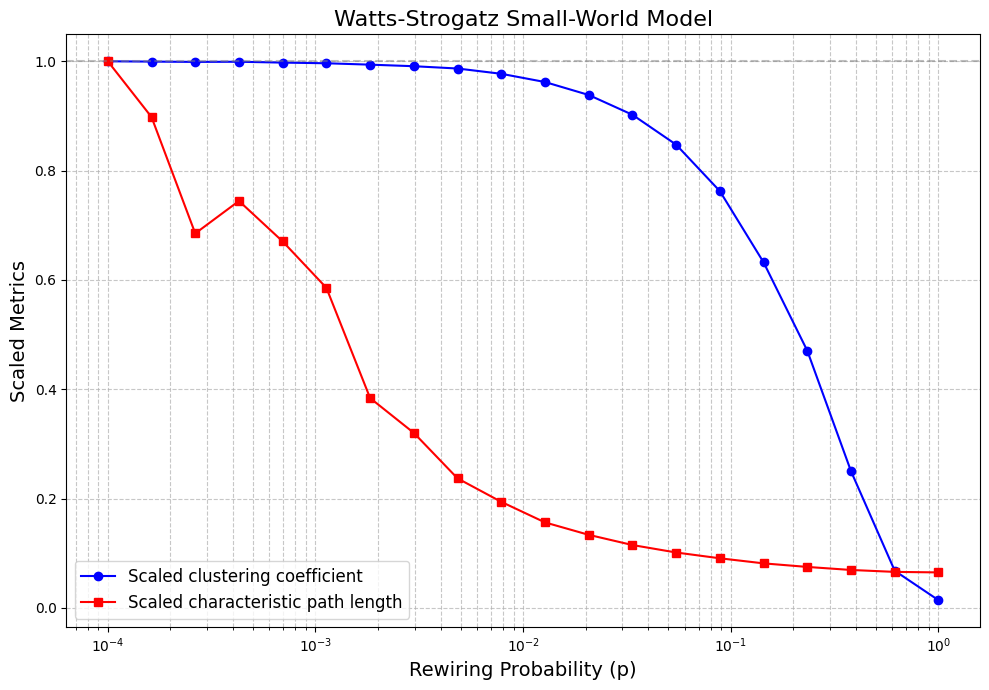

In [1]:
#  Watts and Strogatz's Small-World Network Model

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

# Part 1: Algorithm Implementation
def watts_strogatz_model(n, k, p):
    """
    Generate a Watts-Strogatz small-world network.
    
    Parameters:
    n: Number of nodes
    k: Each node is joined with its k nearest neighbors in a ring topology
    p: The probability of rewiring each edge
    
    Returns:
    G: A Watts-Strogatz small-world network
    """
    G = nx.watts_strogatz_graph(n, k, p)
    return G

# Part 2: Calculation
def compute_metrics(G):
    """
    Compute the clustering coefficient and average path length of a graph.
    
    Parameters:
    G: A NetworkX graph
    
    Returns:
    clustering_coef: Average clustering coefficient
    avg_path_length: Average shortest path length
    """
    clustering_coef = nx.average_clustering(G)
    try:
        avg_path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        avg_path_length = float('inf')
    return clustering_coef, avg_path_length

def experiment(n, k, p_values, num_realizations=10):
    """
    Run the Watts-Strogatz model for multiple p values and compute metrics.
    
    Parameters:
    n: Number of nodes
    k: Each node is connected to k nearest neighbors in ring topology
    p_values: List of rewiring probabilities
    num_realizations: Number of realizations for each p value
    
    Returns:
    p_values: Array of p values
    C_values: Average clustering coefficients
    L_values: Average path lengths
    """
    # Regular ring lattice (p=0)
    G_regular = watts_strogatz_model(n, k, 0)
    C_regular, L_regular = compute_metrics(G_regular)
    
    # Arrays to store results
    C_values = np.zeros(len(p_values))
    L_values = np.zeros(len(p_values))
    
    # For each p value
    for i, p in enumerate(tqdm(p_values)):
        C_samples = np.zeros(num_realizations)
        L_samples = np.zeros(num_realizations)
        
        # Create multiple realizations
        for j in range(num_realizations):
            G = watts_strogatz_model(n, k, p)
            C_samples[j], L_samples[j] = compute_metrics(G)
        
        # Store average values
        C_values[i] = np.mean(C_samples)
        L_values[i] = np.mean(L_samples)
    
    # Normalize values
    C_normalized = C_values / C_regular
    L_normalized = L_values / L_regular
    
    return p_values, C_normalized, L_normalized, C_values, L_values

# Part 3: Plotting
def plot_results(p_values, C_normalized, L_normalized):
    """
    Plot the scaled clustering coefficient and characteristic path length.
    
    Parameters:
    p_values: Array of p values
    C_normalized: Scaled clustering coefficients
    L_normalized: Scaled characteristic path lengths
    """
    plt.figure(figsize=(10, 7))
    plt.plot(p_values, C_normalized, 'o-', color='blue', label='Scaled clustering coefficient', markersize=6)
    plt.plot(p_values, L_normalized, 's-', color='red', label='Scaled characteristic path length', markersize=6)
    plt.xscale('log')
    plt.xlabel('Rewiring Probability (p)', fontsize=14)
    plt.ylabel('Scaled Metrics', fontsize=14)
    plt.title('Watts-Strogatz Small-World Model', fontsize=16)
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Parameters
    n = 1000  # Number of nodes
    k = 10    # Number of neighbors
    p_values = np.logspace(-4, 0, 20)  # Rewiring probabilities
    num_realizations = 5  # Number of realizations for each p value
    
    # Run experiment
    p_values, C_normalized, L_normalized, C_values, L_values = experiment(n, k, p_values, num_realizations)
    # Print results 
    print(f"{'p':<15}{'C/C0':<25}{'L/L0':<25}")
    print("=" * 65)
    for p, C_norm, L_norm in zip(p_values, C_normalized, L_normalized):
        print(f"{p:<15.4f}{C_norm:<25.4f}{L_norm:<25.4f}")

    
    # # Print results
    
    # print("Rewiring Probability (p) | Scaled Clustering Coefficient (C/C0) | Scaled Characteristic Path Length (L/L0)")
    # for p, C_norm, L_norm in zip(p_values, C_normalized, L_normalized):
    #     print(f"{p:.4f} | {C_norm:.4f} | {L_norm:.4f}")
    
    # Plot results
    plot_results(p_values, C_normalized, L_normalized)